<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Matthew/2D_Convex_Hull_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import math



### Dot product Function for any three points
Initially thought this would be useful when trying to implement the gift wrapping method / Graham Scan


In [ ]:
def dot_product(past_point, curr_point, next_point):
  vec_1 = [past_point[0] - curr_point[0], past_point[1] - curr_point[1]]
  vec_2 = [next_point[0] - curr_point[0], next_point[1] - curr_point[1]]

  prod = vec_1[0] * vec_2[0] + vec_1[1] * vec_2[1]

  if prod > 0:
    return 1 #acute
  elif prod < 0:
    return 2 #obtuse
  elif prod == 0:
    return 0 #orthogonal

## Orientation
Will tell the orientation of any 3 points given the order past current and next of the points

Useful to orient any given 3 points on the convex hall to tell whether the next point is going to be on the hull
- If the next point turns inward to make clockwise turn, then it will no longer be on the convex hull, then we can test again on another point


In [3]:
def orientation(past, curr, next):
    #Find orientation, counterclockwise, clockwise, or colinear of a set of 3
    val = (curr[1]-past[1])*(next[0]-curr[0]) - (next[1]-curr[1])*(curr[0]-past[0])
    if val == 0:
        return 0  #collinear
    elif val > 0:
        return 1 #clock
    else:
        return 2 #counterclock

## Hull Algorithm

In [79]:
def hull_algorithm(points):
  n = len(points)
  if n <= 3:
    return points

  #Find lowest y
  sorted_indices = np.argsort(points[:,1])
  sorted_points_y_vals = points[sorted_indices]
  start_point = sorted_points_y_vals[0]

  #Find angle between start_point and the rest of the points (polar angle)
  sorted_by_angle = sorted(points, key = lambda point: (math.atan2(start_point[1]-point[1], start_point[0]-point[0])))

  convex_hull = [start_point, sorted_by_angle[0], sorted_by_angle[1]]

  for i in range(2, len(points)):
    while orientation(convex_hull[-2], convex_hull[-1], sorted_by_angle[i]) != 2:
      convex_hull.pop()
    convex_hull.append(sorted_by_angle[i])


  del convex_hull[0]
  return np.array(convex_hull)


## Test

In [96]:
npoints= 100
points=np.random.rand(npoints,2)*10





In [97]:
hull_points = hull_algorithm(points)

## Plotting


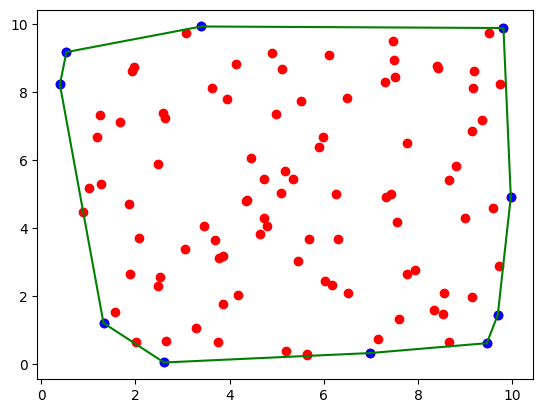

In [98]:
all_xpoints = points[:,0]
all_ypoints = points[:,1]

hull_xpoints = hull_points[:,0]
hull_ypoints = hull_points[:,1]

plt.plot(all_xpoints, all_ypoints, "o", color = "red") #Interior points of the hull are red
plt.plot(hull_xpoints, hull_ypoints, "o", color = "blue") #Hull points are blue

#plot lines between hull points

for i in range(len(hull_points)-1):
  curr_x = [hull_points[i,0], hull_points[i+1,0]]
  curr_y = [hull_points[i,1], hull_points[i+1,1]]
  plt.plot(curr_x, curr_y, color = "green")

first_and_last_x = [hull_points[0,0], hull_points[-1,0]]
first_and_last_y = [hull_points[0,1], hull_points[-1,1]]

plt.plot(first_and_last_x, first_and_last_y, color = "green")


